# Pandas教程
### 2018七月在线 机器学习集训营 julyedu.com 
by 褚则伟 zeweichu@gmail.com

## 目录
- Groupby和Aggregate
- 表格的匹配与拼接
- bikes项目

## Groupby and Aggregate
### 2018七月在线 机器学习集训营 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

   Bonus   Name  Salary  Year
0   3000   July   10000  2016
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
3   1200    Han    5000  2016
4   4000   July   18000  2017
5   2300   July   25000  2017
6    500  Zewei    3000  2017
7   1000   July    4000  2017


接下来我给大家演示一下什么叫做Group By

In [2]:
group_by_name = salaries.groupby('Name')
group_by_name

groupby构造了一个GroupBy object，我们可以对这个object做各种操作，比如求个和，当然我们后面还会详细的介绍各种GroupBy之后的操作

In [4]:
group_by_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


groupby还有一些高级的用法，我们来看看[documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [5]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),'D' : np.random.randn(8), 
                   'E' : np.random.randn(8)})
df

,A,B,C,D,E
0,foo,one,1.139636,-0.281192,-0.733642
1,bar,one,1.446605,-0.172430,0.599419
2,foo,two,2.061302,-0.811624,1.197943
3,bar,three,0.097702,1.017558,-0.408935
4,foo,two,0.162273,-0.307276,0.629209
5,bar,two,-0.243166,-0.650337,-0.243446
6,foo,one,-0.925191,-1.390800,1.333082
7,foo,three,-0.109557,-0.664554,1.264796


In [27]:
def get_letter_type(letter):
    if letter.lower() in "aeiou":
        return "vowel"
    else:
        return "consonant"

In [24]:
get_letter_type = lambda letter: "vowel" if letter.lower() in "aeiou" else "consonant"

In [28]:
grouped = df.groupby(get_letter_type, axis=1)

In [29]:
grouped.sum()

,consonant,vowel
0,0.858444,-0.733642
1,1.274175,0.599419
2,1.249678,1.197943
3,1.115260,-0.408935
4,-0.145003,0.629209
5,-0.893502,-0.243446
6,-2.315991,1.333082
7,-0.774111,1.264796


### groupby之后一般要做一些aggregate操作

In [9]:
group_by_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


默认会排序，也可以选择不排序

In [10]:
salaries.groupby('Name', sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [11]:
group_by_name.aggregate(sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [12]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


可以用多个columns做group by

In [13]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

除了sum之外，我们再来尝试一下size,mean,median 

In [14]:
group_by_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [15]:
group_by_name.mean()

,Bonus,Salary,Year
Name,,,
Han,1200.000000,5000.0,2016.000000
July,2575.000000,14250.0,2016.750000
Zewei,833.333333,3000.0,2016.333333


In [16]:
group_by_name.median()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,2650,14000,2017
Zewei,1000,3000,2016


In [17]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [18]:
for name, group in group_by_name:
    print(name)
    print(group)

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017


选择一个group

In [19]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))

   Bonus  Salary  Year
1   1000    2000  2016
2   1000    4000  2016
6    500    3000  2017


pandas.core.frame.DataFrame

agg是aggregate的alias，可以替代使用

In [20]:
group_by_name.agg([np.sum, np.mean, np.std])

Bonus                           Salary                      Year  \
         sum         mean          std    sum   mean          std   sum   
Name                                                                      
Han     1200  1200.000000          NaN   5000   5000          NaN  2016   
July   10300  2575.000000  1260.621540  57000  14250  9178.779875  8067   
Zewei   2500   833.333333   288.675135   9000   3000  1000.000000  6049   

                             
              mean      std  
Name                         
Han    2016.000000      NaN  
July   2016.750000  0.50000  
Zewei  2016.333333  0.57735

对每一列可以采用不同的aggregate操作

In [21]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum})

,Bonus,Salary
Name,,
Han,1200,5000
July,10300,57000
Zewei,2500,9000


In [22]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum, "Year": (lambda x: list(x)[0])})

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,2016
Zewei,2500,9000,2016


In [22]:
group_by_name_year.describe()

Bonus                                                           \
           count         mean         std     min     25%     50%     75%   
Name  Year                                                                  
Han   2016   1.0  1200.000000         NaN  1200.0  1200.0  1200.0  1200.0   
July  2016   1.0  3000.000000         NaN  3000.0  3000.0  3000.0  3000.0   
      2017   3.0  2433.333333  1504.43788  1000.0  1650.0  2300.0  3150.0   
Zewei 2016   2.0  1000.000000     0.00000  1000.0  1000.0  1000.0  1000.0   
      2017   1.0   500.000000         NaN   500.0   500.0   500.0   500.0   

                   Salary                                                \
               max  count          mean           std      min      25%   
Name  Year                                                                
Han   2016  1200.0    1.0   5000.000000           NaN   5000.0   5000.0   
July  2016  3000.0    1.0  10000.000000           NaN  10000.0  10000.0   
      2017  4000.0    3.0  15666.666667  10692.676622   4000.0  11000.0   
Zewei 2016  1000.0    2.0   3000.000000   1414.213562   2000.0   2500.0   
      2017   500.0    1.0   3000.000000           NaN   3000.0   3000.0   

                                       
                50%      75%      max  
Name  Year                             
Han   2016   5000.0   5000.0   5000.0  
July  2016  10000.0  10000.0  10000.0  
      2017  18000.0  21500.0  25000.0  
Zewei 2016   3000.0   3500.0   4000.0  
      2017   3000.0   3000.0   3000.0

### transform
transform会把group中的每一个record都按照同样的规则转化

In [30]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0)
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [31]:
key = lambda x: x[:4]

In [32]:
nvda.groupby(key).mean()

,Open,High,Low,Close,Adj Close,Volume
1999,1.950782,2.007317,1.883559,1.947230,1.808134,6.433220e+06
2000,8.781084,9.222697,8.360522,8.778826,8.151729,1.104182e+07
2001,13.091254,13.600750,12.680548,13.181552,12.239956,2.782387e+07
2002,9.690344,9.955093,9.344391,9.614749,8.927940,3.168655e+07
2003,5.902434,6.042659,5.764960,5.900344,5.478865,2.430220e+07
2004,6.484735,6.608810,6.353558,6.465913,6.004034,1.706331e+07
2005,9.512381,9.659656,9.353175,9.513823,8.834223,1.542825e+07
2006,18.057902,18.425126,17.720279,18.095963,16.803316,1.534446e+07
2007,27.762045,28.251673,27.206056,27.724542,25.744098,1.514562e+07
2008,16.004308,16.426245,15.521462,15.945613,14.806572,2.022721e+07


In [33]:
zscore = lambda x: (x-x.mean())/x.std()

In [34]:
transformed = nvda.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


我们来尝试一下把这些数据画出来

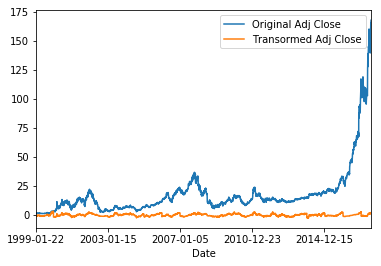

In [35]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

In [37]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(key).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [38]:
nvda.groupby(key).transform("max").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-25,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-26,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-27,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-28,3.947917,3.953125,3.84375,3.911458,3.632052,67867200


In [39]:
(nvda.groupby(key).transform("max") - nvda.groupby(key).transform("min")).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200


### filter

比如我们想要找出符合统计特征的一些内容，就像SQL里面的having, where语句

In [40]:
s = pd.Series([1,1,2,2,2,3,4,4,5])
s.groupby(s).filter(lambda x: x.sum() > 4)

2    2
3    2
4    2
6    4
7    4
8    5
dtype: int64

In [41]:
df = pd.DataFrame({"A": np.arange(8), "B":list("aaabbbcc")})
df.groupby("B").filter(lambda x: len(x) > 2)

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b


我们来看看均价超过100的有哪些月份

In [42]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [43]:
key_month = lambda x: x[0:7]

In [44]:
nvda.groupby(key_month).filter(lambda x: x["Adj Close"].mean() > 50).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01,46.750000,47.360001,46.500000,46.660000,46.397064,5462200
2016-07-05,46.400002,47.430000,46.029999,47.349998,47.083176,9277100
2016-07-06,47.020000,47.930000,46.779999,47.650002,47.381493,6827600
2016-07-07,47.970001,49.060001,47.750000,48.889999,48.614498,9885000
2016-07-08,49.410000,51.090000,49.220001,50.849998,50.563454,12048300


### apply
apply可以针对每一个分类的数据做各种操作。

In [46]:
nvda_month = nvda.groupby(key_month)
nvda_month

In [51]:
nvda_month.apply(lambda x: x.describe())

Open        High         Low       Close   Adj Close  \
1999-01 count    6.000000    6.000000    6.000000    6.000000    6.000000   
        mean     1.726562    1.786458    1.609375    1.672743    1.553254   
        std      0.069546    0.116462    0.041667    0.075793    0.070379   
        min      1.661458    1.666667    1.552083    1.583333    1.470231   
        25%      1.669271    1.687500    1.583333    1.645833    1.528266   
        50%      1.713542    1.776042    1.611979    1.664062    1.545193   
        75%      1.765625    1.860677    1.644531    1.670573    1.551239   
        max      1.833333    1.953125    1.651042    1.812500    1.683028   
1999-02 count   19.000000   19.000000   19.000000   19.000000   19.000000   
        mean     1.701754    1.762336    1.622533    1.686403    1.565939   
        std      0.174838    0.176923    0.134449    0.137005    0.127219   
        min      1.468750    1.541667    1.442708    1.489583    1.383178   
        25%      1.583333    1.640625    1.520833    1.598958    1.484741   
        50%      1.666667    1.729167    1.593750    1.656250    1.537939   
        75%      1.770833    1.817708    1.661458    1.750000    1.624992   
        max      2.104167    2.187500    1.932292    1.979167    1.837789   
1999-03 count   23.000000   23.000000   23.000000   23.000000   23.000000   
        mean     1.746150    1.788270    1.683424    1.728714    1.605227   
        std      0.079054    0.068821    0.071877    0.073973    0.068689   
        min      1.578125    1.593750    1.520833    1.583333    1.470231   
        25%      1.708333    1.760417    1.640625    1.697917    1.576630   
        50%      1.739583    1.791667    1.687500    1.744792    1.620156   
        75%      1.791667    1.833333    1.734375    1.776042    1.649174   
        max      1.875000    1.916667    1.791667    1.838542    1.707209   
1999-04 count   21.000000   21.000000   21.000000   21.000000   21.000000   
        mean     1.610119    1.643849    1.554563    1.591766    1.478061   
        std      0.108682    0.105531    0.106937    0.107088    0.099438   
        min      1.395833    1.458333    1.333333    1.364583    1.267107   
        25%      1.520833    1.583333    1.494792    1.510417    1.402523   
        50%      1.604167    1.645833    1.562500    1.583333    1.470231   
...                   ...         ...         ...         ...         ...   
2017-04 std      3.423591    3.141937    3.219755    3.213878    3.210497   
        min     96.010002   97.209999   95.489998   95.489998   95.389534   
        25%     99.325001  100.084999   97.599998   99.260002   99.155571   
        50%    100.360001  101.730003   99.500000  100.760002  100.653992   
        75%    103.470001  104.875000  102.389999  103.484997  103.376121   
        max    108.949997  109.650002  107.419998  108.379997  108.265976   
2017-05 count   22.000000   22.000000   22.000000   22.000000   22.000000   
        mean   124.681818  127.030454  122.859092  125.236363  125.158156   
        std     16.104497   16.332434   15.399242   15.885516   15.921186   
        min    103.000000  104.150002  102.309998  102.769997  102.661873   
        25%    104.942499  105.912498  103.759999  104.847500  104.737192   
        50%    129.529999  133.919999  127.300003  130.480003  130.342728   
        75%    137.889996  139.712494  136.257503  137.952496  137.952496   
        max    146.690002  147.000000  143.050003  144.869995  144.869995   
2017-06 count   22.000000   22.000000   22.000000   22.000000   22.000000   
        mean   151.868639  154.240455  147.953636  151.222271  151.222271   
        std      5.737779    5.810822    4.870291    4.887210    4.887210   
        min    142.979996  145.029999  142.110001  143.639999  143.639999   
        25%    147.490006  150.090004  143.645001  147.507496  147.507496   
        50%    151.480003  153.830002  146.650002  151.509995  151.509995   
        75%    15

In [47]:
def f(group):
    return pd.DataFrame({"original": group,
                        "demeaned": group - group.mean()})
nvda_month["Adj Close"].apply(f).tail()

,demeaned,original
Date,,
2017-07-14,8.557689,164.949997
2017-07-17,7.857692,164.250000
2017-07-18,9.567699,165.960007
2017-07-19,8.707698,165.100006
2017-07-20,11.107692,167.500000


In [48]:
def zscored(group):
    return pd.DataFrame({"original": group,
                        "zscore": (group - group.mean()) / group.std()})
nvda_month["Adj Close"].apply(zscored).tail()

,original,zscore
Date,,
2017-07-14,164.949997,0.849678
2017-07-17,164.250000,0.780176
2017-07-18,165.960007,0.949960
2017-07-19,165.100006,0.864572
2017-07-20,167.500000,1.102863


### 小结： 
Group by: split-apply-combine
- 首先第一步是分离数据split，按照一定的规则把数据分成几类。
- 第二步是对每一部分数据都做一定的操作apply，这个操作可以是汇总操作aggregate，可以是一个变换transform，也可以是过滤数据filter。
- 最后一步就是把处理过的数据再合成一张DataFrame。


## 表格匹配与拼接
### 2018七月在线 机器学习集训营 julyedu.com 
- concat
- append
- merge
- join

In [40]:
import pandas as pd
import numpy as np

In [41]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [42]:
df2 = pd.DataFrame({'cars': [150000, 120000],
                    'apts': [25000, 20000],
                   },
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [43]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


### concatenate

In [44]:
frames = [df1, df2, df3] 
result = pd.concat(frames)
print(result)

            apts    cars
Shanghai   55000  200000
Beijing    60000  300000
Hangzhou   25000  150000
Najing     20000  120000
Guangzhou  30000  180000
Chongqing  10000  100000


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [45]:
result2 = pd.concat(frames, keys=['x', 'y', 'z'])
print(result2)

              apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Najing     20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000


In [46]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


In [47]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [48]:
result3 = pd.concat([result, df4], axis=1)
print(result3)

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Chongqing  10000.0  100000.0       NaN
Guangzhou  30000.0  180000.0   20000.0
Hangzhou   25000.0  150000.0       NaN
Najing     20000.0  120000.0       NaN
Shanghai   55000.0  200000.0   30000.0
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


复习一下前面讲过的stack

In [49]:
print(result3.stack())
print(type(result3.stack()))

Beijing    apts         60000.0
           cars        300000.0
           salaries     30000.0
Chongqing  apts         10000.0
           cars        100000.0
Guangzhou  apts         30000.0
           cars        180000.0
           salaries     20000.0
Hangzhou   apts         25000.0
           cars        150000.0
Najing     apts         20000.0
           cars        120000.0
Shanghai   apts         55000.0
           cars        200000.0
           salaries     30000.0
Suzhou     salaries     10000.0
Tianjin    salaries     15000.0
dtype: float64
<class 'pandas.core.series.Series'>


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [50]:
result3 = pd.concat([result, df4], axis=1, join='inner')
print(result3)

            apts    cars  salaries
Shanghai   55000  200000     30000
Beijing    60000  300000     30000
Guangzhou  30000  180000     20000


#### 用```append```来做concatenation

In [51]:
print(df1.append(df2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Hangzhou  25000  150000
Najing    20000  120000


In [52]:
print(df1.append(df4))

              apts      cars  salaries
Shanghai   55000.0  200000.0       NaN
Beijing    60000.0  300000.0       NaN
Suzhou         NaN       NaN   10000.0
Beijing        NaN       NaN   30000.0
Shanghai       NaN       NaN   30000.0
Guangzhou      NaN       NaN   20000.0
Tianjin        NaN       NaN   15000.0


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [53]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [54]:
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [55]:
print(pd.concat([df1, s1], axis=1))

           apts    cars  meal
Shanghai  55000  200000    60
Beijing   60000  300000    50


下面讲如何append一个row到DataFrame里。

In [56]:
s2 = pd.Series([18000, 12000], index=['apts', 'cars'], name='Xiamen') #注意这里的name是必须要有的，因为要用作Index。
print(s2)

apts    18000
cars    12000
Name: Xiamen, dtype: int64


In [57]:
print(df1.append(s2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Xiamen    18000   12000


### Merge(Join)
### 2018七月在线 机器学习集训营 julyedu.com 

In [58]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000],
                  'city': ['Shanghai', 'Beijing','Shenzhen']})
print(df1)

    apts    cars      city
0  55000  200000  Shanghai
1  60000  300000   Beijing
2  58000  250000  Shenzhen


In [59]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],
                  'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})
print(df4)

        city  salaries
0     Suzhou     10000
1    Beijing     30000
2   Shanghai     30000
3  Guangzhou     20000
4    Tianjin     15000


In [60]:
result = pd.merge(df1, df4, on='city')
print(result)

    apts    cars      city  salaries
0  55000  200000  Shanghai     30000
1  60000  300000   Beijing     30000


In [61]:
result = pd.merge(df1, df4)
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [62]:
result = pd.merge(df1, df4, on='city', how='outer')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai   30000.0
1  60000.0  300000.0    Beijing   30000.0
2  58000.0  250000.0   Shenzhen       NaN
3      NaN       NaN     Suzhou   10000.0
4      NaN       NaN  Guangzhou   20000.0
5      NaN       NaN    Tianjin   15000.0


In [63]:
result = pd.merge(df1, df4, on='city', how='right')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai     30000
1  60000.0  300000.0    Beijing     30000
2      NaN       NaN     Suzhou     10000
3      NaN       NaN  Guangzhou     20000
4      NaN       NaN    Tianjin     15000


In [64]:
result = pd.merge(df1, df4, on='city', how='left')
print(result)

    apts    cars      city  salaries
0  55000  200000  Shanghai   30000.0
1  60000  300000   Beijing   30000.0
2  58000  250000  Shenzhen       NaN


#### join on index

In [65]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000]},
                  index=['Shanghai', 'Beijing','Shenzhen'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Shenzhen  58000  250000


In [66]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index=['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [67]:
print(df1.join(df4))

           apts    cars  salaries
Shanghai  55000  200000   30000.0
Beijing   60000  300000   30000.0
Shenzhen  58000  250000       NaN


In [68]:
print(df1.join(df4, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Guangzhou      NaN       NaN   20000.0
Shanghai   55000.0  200000.0   30000.0
Shenzhen   58000.0  250000.0       NaN
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


也可以用merge来写

In [69]:
print(pd.merge(df1, df4, left_index=True, right_index=True, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Guangzhou      NaN       NaN   20000.0
Shanghai   55000.0  200000.0   30000.0
Shenzhen   58000.0  250000.0       NaN
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


## 项目时间
### 2018七月在线 机器学习集训营 julyedu.com

我们来尝试一个例子，读取一些自行车的数据

bikes.csv记录了Montreal自行车路线的数据，具体有7条路线，分别记录了每条自行车路线每天有多少人经过

In [53]:
# bikes = pd.read_csv("data/bikes.csv")

怎么报错了？不要慌，我们Google一下这个错误是什么意思。

In [54]:
bikes = pd.read_csv("data/bikes.csv", encoding="latin-1")
bikes.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


这个数据读进来都揉成一团了，为什么呢？因为这个数据的格式并不是用逗号分隔的，而是用分号分隔的。所以我们要声明一下sep

In [55]:
bikes = pd.read_csv('data/bikes.csv', sep=';', parse_dates=['Date'], \
                    encoding='latin1', dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


这样读进来的数据就正常了，还有一个问题，就是数据看起来有好多的NaN。dropna可以帮我们删掉一些带NA的行或者列。

In [56]:
bikes.shape

(310, 9)

In [57]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [60]:
bikes.dropna(how = "all").head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [61]:
bikes.dropna(how = "all").shape

(310, 9)

dropna默认是删掉行，如果想删掉一列，就要声明一下axis参数

In [62]:
bikes.dropna(how="all", axis=1).head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [63]:
bikes.dropna(how="all", axis=1).shape

(310, 7)

下面给大家介绍一下如何填充缺失的数据

In [64]:
row = bikes.iloc[0].copy()
row

Berri 1                                35.0
Brébeuf (données non disponibles)       NaN
Côte-Sainte-Catherine                   0.0
Maisonneuve 1                          38.0
Maisonneuve 2                          51.0
du Parc                                26.0
Pierre-Dupuy                           10.0
Rachel1                                16.0
St-Urbain (données non disponibles)     NaN
Name: 2012-01-01 00:00:00, dtype: float64

In [65]:
row.fillna(row.mean())

Berri 1                                35.000000
Brébeuf (données non disponibles)      25.142857
Côte-Sainte-Catherine                   0.000000
Maisonneuve 1                          38.000000
Maisonneuve 2                          51.000000
du Parc                                26.000000
Pierre-Dupuy                           10.000000
Rachel1                                16.000000
St-Urbain (données non disponibles)    25.142857
Name: 2012-01-01 00:00:00, dtype: float64

In [66]:
m = bikes.mean(axis=1)
for i, col in enumerate(bikes):
    bikes.iloc[:, i] = bikes.iloc[:, i].fillna(m)
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429


下面这样的话一行就可以写完

In [67]:
bikes.fillna(bikes.mean(0))

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,25.142857,0,38,51,26,10,16,25.142857
2012-01-02,83,58.142857,1,68,153,53,6,43,58.142857
2012-01-03,135,91.285714,2,104,248,89,3,58,91.285714
2012-01-04,144,108.428571,1,116,318,111,8,61,108.428571
2012-01-05,197,122.571429,2,124,330,97,13,95,122.571429
2012-01-06,146,93.285714,0,98,244,86,4,75,93.285714
2012-01-07,98,57.285714,2,80,108,53,6,54,57.285714
2012-01-08,95,56.285714,1,62,98,64,11,63,56.285714
2012-01-09,244,175.142857,2,165,432,198,12,173,175.142857


In [68]:
berri_bikes = bikes[["Berri 1"]].copy()
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [69]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [70]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [71]:
berri_bikes.loc[:, "weekday"] = berri_bikes.index.weekday
berri_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [72]:
weekday_counts = berri_bikes.groupby("weekday").mean()
weekday_counts

,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


In [73]:
weekday_counts.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts

,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


In [74]:
bikes_avg = bikes.mean(axis=1).to_frame()
bikes_avg.columns = ["bikes_avg"]
bikes_avg.head()

,bikes_avg
Date,
2012-01-01,25.142857
2012-01-02,58.142857
2012-01-03,91.285714
2012-01-04,108.428571
2012-01-05,122.571429


In [75]:
bikes_avg.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [76]:
bikes_avg.loc[:, "weekday"] = bikes_avg.index.weekday
bikes_avg.head()

,bikes_avg,weekday
Date,,
2012-01-01,25.142857,6
2012-01-02,58.142857,0
2012-01-03,91.285714,1
2012-01-04,108.428571,2
2012-01-05,122.571429,3


最后我们再来求平均，看看一周当中每天总共有多少自行车通过

In [77]:
weekday_avg = bikes_avg.groupby("weekday").mean()
weekday_avg.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg

,bikes_avg
Monday,2269.723810
Tuesday,2268.123377
Wednesday,2564.032468
Thursday,2691.782468
Friday,2398.610390
Saturday,1677.600649
Sunday,1644.593651


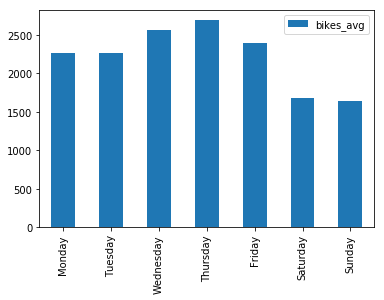

In [78]:
%matplotlib inline
weekday_avg.plot(kind="bar")

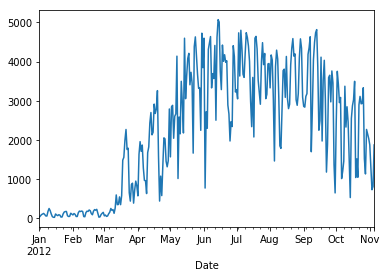

In [79]:
bikes_avg["bikes_avg"].plot()

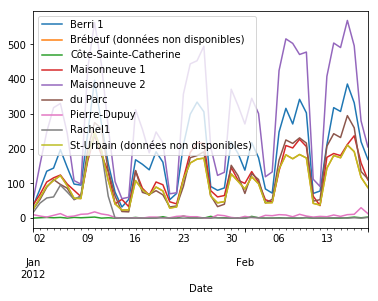

In [80]:
bikes.iloc[:50, :].plot()

## 项目时间
### 2018七月在线 机器学习集训营 julyedu.com 
下面我们通过一个做股票分析的小项目带着大家熟悉一下pandas表格拼接和处理的操作。可参考以下博客文章。

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [108]:
import pandas as pd
%matplotlib inline
import numpy as np

In [81]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=["Date"])
goog.reindex(pd.to_datetime(goog.index))
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

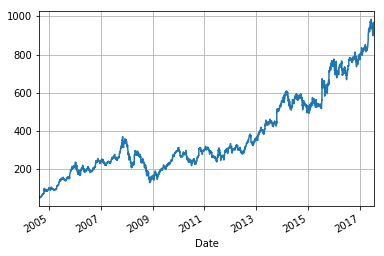

In [82]:
goog["Adj Close"].plot(grid = True)

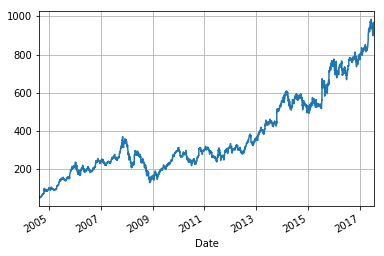

In [83]:
goog["Close"].plot(grid = True)

```shift```这个function可以帮我们移动时间

In [84]:
goog.shift(1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,49.813286,51.835709,47.800831,49.982655,49.982655,44871300.0
2004-08-23,50.316402,54.336334,50.062355,53.952770,53.952770,22942800.0
2004-08-24,55.168217,56.528118,54.321388,54.495735,54.495735,18342800.0
2004-08-25,55.412300,55.591629,51.591621,52.239193,52.239193,15319700.0


In [113]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


datetime indexing

In [86]:
goog["log-return"] = np.log(goog["Adj Close"] / goog["Adj Close"].shift(1))
print(goog["log-return"].head())

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: log-return, dtype: float64


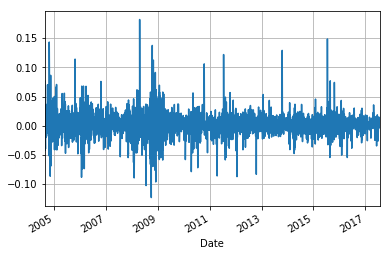

In [87]:
goog["log-return"].plot(grid=True)

In [89]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0)
aapl.index = pd.to_datetime(aapl.index)
aapl["Adj Close"].plot(grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

怎么回事？出错了？我们尝试着一起来debug一下看看

In [90]:
aapl["Adj Close"].dtype

dtype('O')

In [91]:
for i in range(aapl["Adj Close"].shape[0]):
    print(i, float(aapl["Adj Close"][i]))

0 0.423252
1 0.40117
2 0.371726
3 0.380927
4 0.391969
5 0.415892
6 0.436134
7 0.454536
8 0.47846
9 0.522625
10 0.529986
11 0.517104
12 0.502382
13 0.507903
14 0.496862
15 0.474779
16 0.454536
17 0.445336
18 0.469258
19 0.465578
20 0.449016
21 0.450856
22 0.460057
23 0.456377
24 0.48398
25 0.469258
26 0.47846
27 0.48398
28 0.48214
29 0.474779
30 0.471099
31 0.456377
32 0.439815
33 0.415892
34 0.391969
35 0.406691
36 0.421412
37 0.421412
38 0.423252
39 0.40117
40 0.40117
41 0.388288
42 0.384608
43 0.375407
44 0.384608
45 0.40117
46 0.377247
47 0.357004
48 0.362525
49 0.349644
50 0.371726
51 0.377247
52 0.390128
53 0.391969
54 0.386448
55 0.382768
56 0.380927
57 0.377247
58 0.347803
59 0.331241
60 0.31836
61 0.331241
62 0.327561
63 0.340442
64 0.357004
65 0.379087
66 0.375407
67 0.379087
68 0.393809
69 0.391969
70 0.384608
71 0.377247
72 0.364365
73 0.364365
74 0.360685
75 0.357004
76 0.388288
77 0.390128
78 0.382768
79 0.379087
80 0.39749
81 0.40485
82 0.410371
83 0.410371
84 0.410371
85

ValueError: could not convert string to float: 'null'

In [97]:
aapl["Adj Close"][165]

'null'

In [98]:
aapl["Adj Close"][aapl["Adj Close"] == "null"] = np.NaN

In [99]:
aapl["Adj Close"].bfill().head()

Date
1980-12-12    0.423252
1980-12-15    0.401170
1980-12-16    0.371726
1980-12-17    0.380927
1980-12-18    0.391969
Name: Adj Close, dtype: object

In [100]:
aapl["Adj Close"] = aapl["Adj Close"].apply(lambda x: float(x))

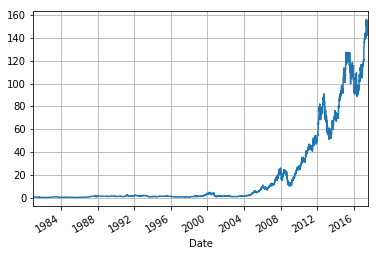

In [101]:
aapl["Adj Close"].plot(grid=True)

In [102]:
msft = pd.read_csv("data/MSFT.csv", index_col=0)
msft.index = pd.to_datetime(msft.index)

尝试一下把三张表格拼接到一起

In [120]:
stocks = pd.concat([aapl["Adj Close"], msft["Adj Close"], goog["Adj Close"]], axis=1)
stocks.columns = ["AAPL", "MSFT", "GOOG"]
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


In [103]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})

In [104]:
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


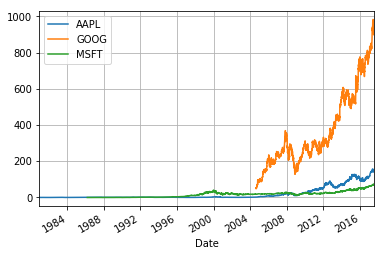

In [105]:
# stocks = pd.to_numeric(stocks)
stocks.plot(grid=True)

In [106]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

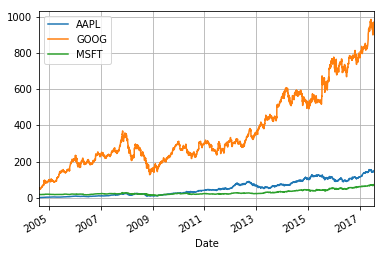

In [107]:
valid_stocks.plot(grid=True)

AAPL    float64
GOOG    float64
MSFT    float64
dtype: object

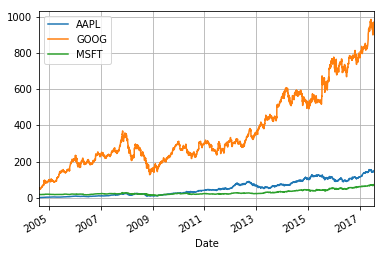

In [108]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

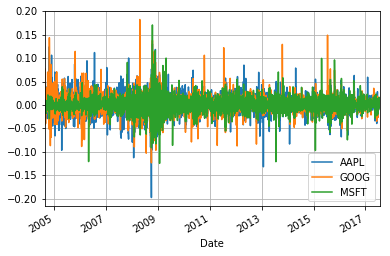

In [109]:
valid_stocks_lr = np.log(valid_stocks / valid_stocks.shift(1))
valid_stocks_lr.plot(grid=True)

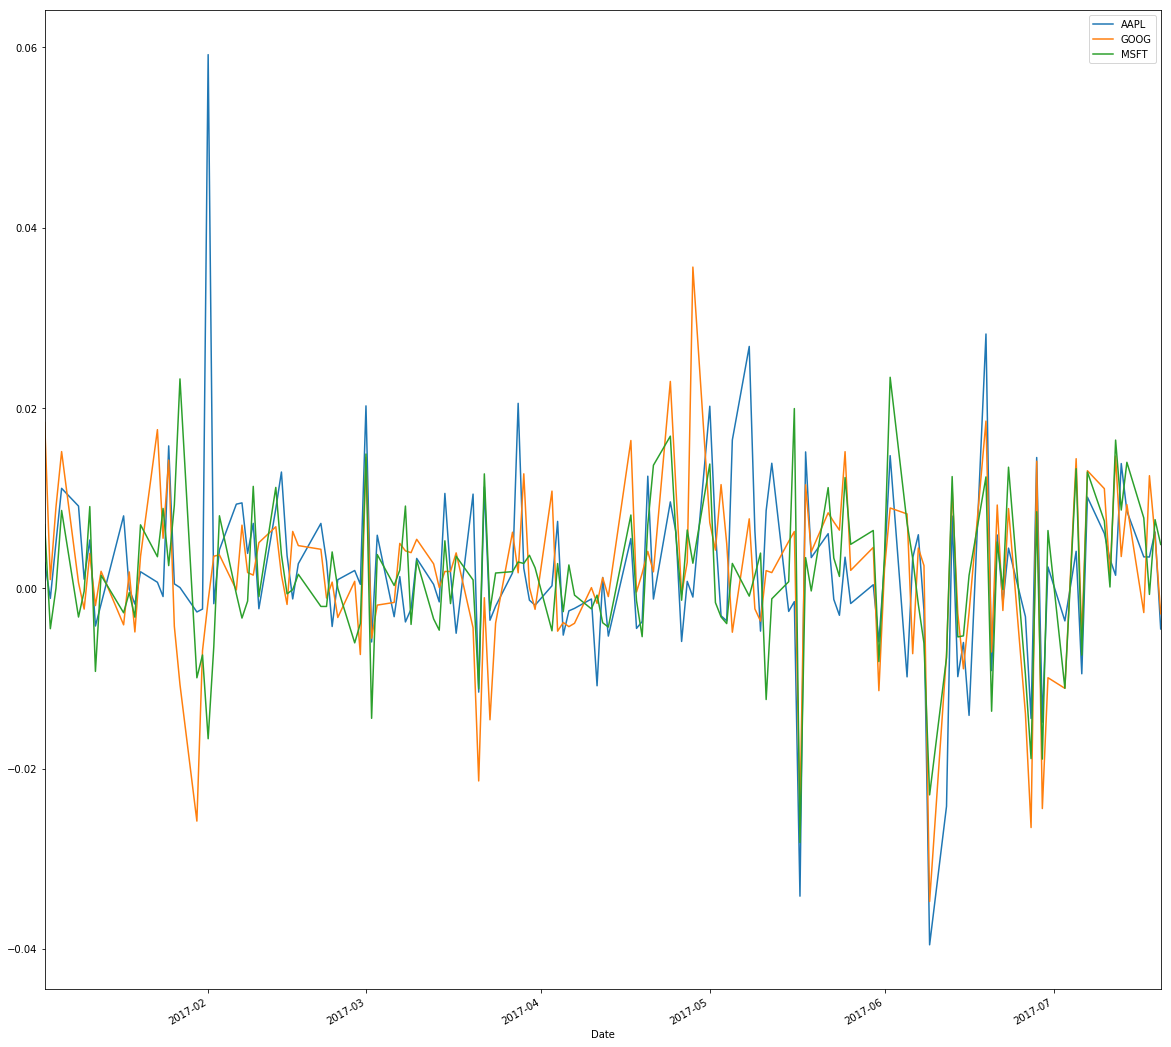

In [110]:
valid_stocks_lr[valid_stocks_lr.index > pd.to_datetime("2017-01-01")].plot(figsize=(20, 20))

In [111]:
valid_stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2004-08-19,1.981210,49.982655,18.360205
2004-08-20,1.987016,53.952770,18.414366
2004-08-23,2.005080,54.495735,18.495850
2004-08-24,2.061206,52.239193,18.495850
2004-08-25,2.132171,52.802086,18.706341


如果我们想要画出月K线呢？

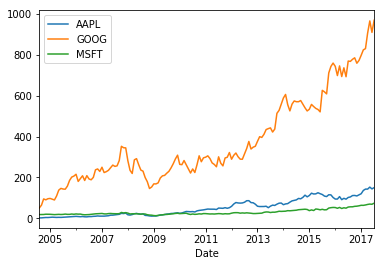

In [112]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks.plot()

In [113]:
monthly_stocks = valid_stocks.groupby([valid_stocks.index.year, valid_stocks.index.month]).last()
monthly_stocks.head()

AAPL       GOOG       MSFT
Date Date                                
2004 8     2.225070  50.993862  18.536587
     9     2.499898  64.558022  18.774242
     10    3.380507  94.964050  18.991516
     11    4.325631  90.650223  20.288960
     12    4.154669  96.035034  20.220860

In [142]:
index = [ str(i[0]) + "-" + str(i[1]) for i in monthly_stocks.index.values]
print(index)
index = pd.core.indexes.period.PeriodIndex(index, freq="M")

['2004-8', '2004-9', '2004-10', '2004-11', '2004-12', '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6', '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12', '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6', '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12', '2007-1', '2007-2', '2007-3', '2007-4', '2007-5', '2007-6', '2007-7', '2007-8', '2007-9', '2007-10', '2007-11', '2007-12', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12', '2009-1', '2009-2', '2009-3', '2009-4', '2009-5', '2009-6', '2009-7', '2009-8', '2009-9', '2009-10', '2009-11', '2009-12', '2010-1', '2010-2', '2010-3', '2010-4', '2010-5', '2010-6', '2010-7', '2010-8', '2010-9', '2010-10', '2010-11', '2010-12', '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12', '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012

In [143]:
monthly_stocks.index = index #= monthly_stocks.index.

In [144]:
monthly_stocks.head()

,AAPL,GOOG,MSFT
2004-08,2.225070,50.993862,18.536587
2004-09,2.499898,64.558022,18.774242
2004-10,3.380507,94.964050,18.991516
2004-11,4.325631,90.650223,20.288960
2004-12,4.154669,96.035034,20.220860


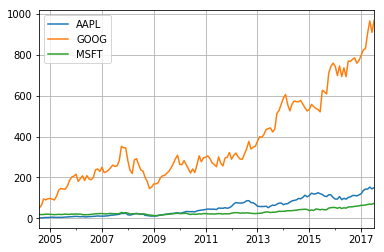

In [145]:
monthly_stocks.plot(grid=True)

In [146]:
monthly_stocks["2011-8"]

,AAPL,GOOG,MSFT
2011-08,49.653461,269.469971,22.714565


## 作业

- 读入NVDA.csv中的数据

- 请计算nvda股票Adj Close每天的log return

- 请找出nvda股票涨幅最大的10天

- 将这十天的股票信息都输出来

- 把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

- 使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

- 从Google有数据的那一天起开始画出四只股票的Adj Close折线图